In [172]:
import xgboost
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

train=pd.read_csv('allstations.csv')
#train[500:5000]

train['time']


0        2017-04-01 00:00:00
1        2017-04-01 01:00:00
2        2017-04-01 02:00:00
3        2017-04-01 03:00:00
4        2017-04-01 04:00:00
5        2017-04-01 05:00:00
6        2017-04-01 06:00:00
7        2017-04-01 07:00:00
8        2017-04-01 08:00:00
9        2017-04-01 09:00:00
10       2017-04-01 10:00:00
11       2017-04-01 11:00:00
12       2017-04-01 12:00:00
13       2017-04-01 13:00:00
14       2017-04-01 14:00:00
15       2017-04-01 15:00:00
16       2017-04-01 16:00:00
17       2017-04-01 17:00:00
18       2017-04-01 18:00:00
19       2017-04-01 19:00:00
20       2017-04-01 20:00:00
21       2017-04-01 21:00:00
22       2017-04-01 22:00:00
23       2017-04-01 23:00:00
24       2017-04-02 00:00:00
25       2017-04-02 01:00:00
26       2017-04-02 02:00:00
27       2017-04-02 03:00:00
28       2017-04-02 04:00:00
29       2017-04-02 05:00:00
                ...         
76410    2017-06-29 18:00:00
76411    2017-06-29 19:00:00
76412    2017-06-29 20:00:00
76413    2017-

In [173]:
train = train[(train['time'] >='2017-05-01 00:00:00')& (train['time'] < '2017-05-02 00:00:00')]
train

,CO,NO2,O3,PM10,PM2.5,SO2,humidity,latitude_x,latitude_y,longitude_x,longitude_y,pressure,stationId,stationName,temperature,time,wind_direction,wind_speed
720,0.6,88.0,3.0,114.0,58.0,6.0,16.42,40.0,39.982,116.4,116.397,1011.60,aotizhongxin_aq,beijing_grid_304,20.06,2017-05-01 00:00:00,38.01,1.186111
721,0.6,70.0,24.0,116.0,54.0,7.0,15.06,40.0,39.982,116.4,116.397,1011.42,aotizhongxin_aq,beijing_grid_304,21.48,2017-05-01 01:00:00,81.43,1.119444
722,0.9,67.0,36.0,84.0,66.0,14.0,13.70,40.0,39.982,116.4,116.397,1011.24,aotizhongxin_aq,beijing_grid_304,22.91,2017-05-01 02:00:00,112.03,1.600000
723,0.9,52.0,59.0,93.0,27.0,15.0,12.34,40.0,39.982,116.4,116.397,1011.06,aotizhongxin_aq,beijing_grid_304,24.33,2017-05-01 03:00:00,126.32,2.308333
724,0.9,45.0,75.0,85.0,24.0,16.0,12.03,40.0,39.982,116.4,116.397,1010.19,aotizhongxin_aq,beijing_grid_304,25.49,2017-05-01 04:00:00,140.23,2.477778
725,1.1,33.0,99.0,102.0,61.0,20.0,11.72,40.0,39.982,116.4,116.397,1009.32,aotizhongxin_aq,beijing_grid_304,26.44,2017-05-01 05:00:00,151.78,2.769444
726,1.1,34.0,111.0,124.0,50.0,19.0,11.42,40.0,39.982,116.4,116.397,1008.44,aotizhongxin_aq,beijing_grid_304,27.40,2017-05-01 06:00:00,160.83,3.152778
727,0.8,28.0,116.0,110.0,39.0,11.0,12.21,40.0,39.982,116.4,116.397,1008.28,aotizhongxin_aq,beijing_grid_304,27.02,2017-05-01 07:00:00,162.61,3.202778
728,0.6,27.0,122.0,86.0,17.0,6.0,13.00,40.0,39.982,116.4,116.397,1008.12,aotizhongxin_aq,beijing_grid_304,26.65,2017-05-01 08:00:00,164.34,3.258333
729,0.5,28.0,125.0,122.0,71.0,6.0,13.79,40.0,39.982,116.4,116.397,1007.95,aotizhongxin_aq,beijing_grid_304,26.27,2017-05-01 09:00:00,166.00,3.313889


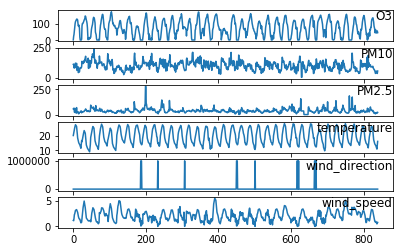

In [174]:
from matplotlib import pyplot
values = train.values
groups = [ 2,3,4,14,16,17]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(train.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [175]:
y_train=train[['PM2.5']]
#y_train_PM25=train[['PM2.5','time']]

#y_train_PM25

In [176]:
x_train=train.drop(['time','NO2','O3','PM10','CO','PM2.5','SO2','latitude_x','latitude_y','longitude_x','longitude_y','stationId','stationName'],axis=1)
#x_train_PM25=train.drop(['NO2','O3','PM10','CO','PM2.5','SO2','latitude_x','latitude_y','longitude_x','longitude_y','stationId','stationName'],axis=1)
x_train.head(5)


,humidity,pressure,temperature,wind_direction,wind_speed
720,16.42,1011.60,20.06,38.01,1.186111
721,15.06,1011.42,21.48,81.43,1.119444
722,13.70,1011.24,22.91,112.03,1.600000
723,12.34,1011.06,24.33,126.32,2.308333
724,12.03,1010.19,25.49,140.23,2.477778


# PM2.5

In [177]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=500, max_depth=5)
model.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [180]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
n_folds = 3
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= -cross_val_score(model, x_train,y_train_PM10, scoring="neg_mean_absolute_error", cv = kf)
    return(rmse)

In [179]:
rmsle_cv(model)

array([18.26012905, 15.15667795, 17.27456421])

In [171]:
def smape(actual, predicted):
    dividend= np.abs(np.array(actual) - np.array(predicted))
    c = np.array(actual) + np.array(predicted)
    denominator= np.array(actual) + np.array(predicted)
    return 2 * np.mean(np.divide(dividend, denominator, out=np.zeros_like(dividend), where=denominator!=0, casting='unsafe'))


# o3model

In [143]:
y_train_O3=train[['O3']]

y_train_O3

,O3
720,3.0
721,24.0
722,36.0
723,59.0
724,75.0
725,99.0
726,111.0
727,116.0
728,122.0
729,125.0


In [144]:
model2 = XGBRegressor(n_estimators=300, max_depth=5)
model2.fit(x_train, y_train_O3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [145]:
rmsle_cv(model2)

array([23.39378703, 25.60831378, 17.82838253])

# PM10 model

In [43]:
y_train_PM10=train[['PM10']]

y_train_PM10

,PM10
720,114.0
721,116.0
722,84.0
723,93.0
724,85.0
725,102.0
726,124.0
727,110.0
728,86.0
729,122.0


In [181]:
model3 = XGBRegressor(n_estimators=300, max_depth=5)
model3.fit(x_train, y_train_PM10)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [182]:
rmsle_cv(model3)

array([28.41556913, 27.9781392 , 30.43859595])

# 2018-04 TEST

In [184]:
train2=pd.read_csv('airQuality_201804.csv')
train2

,id,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,2942426,dongsi_aq,2018-04-01 02:00:00,259.0,NaN,98.0,3.4,56.0,57.0
1,2942427,tiantan_aq,2018-04-01 02:00:00,250.0,NaN,95.0,3.1,64.0,28.0
2,2942428,guanyuan_aq,2018-04-01 02:00:00,240.0,246.0,107.0,2.2,49.0,30.0
3,2942429,wanshouxigong_aq,2018-04-01 02:00:00,255.0,260.0,87.0,2.5,65.0,35.0
4,2942430,aotizhongxin_aq,2018-04-01 02:00:00,266.0,NaN,111.0,3.5,45.0,57.0
5,2942431,nongzhanguan_aq,2018-04-01 02:00:00,265.0,NaN,108.0,3.6,45.0,63.0
6,2942432,wanliu_aq,2018-04-01 02:00:00,210.0,231.0,111.0,2.0,43.0,27.0
7,2942433,beibuxinqu_aq,2018-04-01 02:00:00,210.0,NaN,82.0,1.5,50.0,17.0
8,2942434,zhiwuyuan_aq,2018-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
9,2942435,fengtaihuayuan_aq,2018-04-01 02:00:00,253.0,274.0,117.0,2.1,41.0,19.0


In [185]:
train2_AOTI=train2.loc[train2['station_id'] == 'aotizhongxin_aq']
train2_AOTI

,id,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
4,2942430,aotizhongxin_aq,2018-04-01 02:00:00,266.0,NaN,111.0,3.5,45.0,57.0
39,2942486,aotizhongxin_aq,2018-04-01 03:00:00,279.0,NaN,104.0,3.3,82.0,56.0
74,2942542,aotizhongxin_aq,2018-04-01 04:00:00,275.0,NaN,80.0,2.7,154.0,44.0
109,2942598,aotizhongxin_aq,2018-04-01 05:00:00,258.0,NaN,68.0,2.1,193.0,34.0
144,2942654,aotizhongxin_aq,2018-04-01 06:00:00,253.0,261.0,62.0,1.6,209.0,22.0
179,2942730,aotizhongxin_aq,2018-04-01 08:00:00,176.0,208.0,40.0,0.8,214.0,13.0
214,2942786,aotizhongxin_aq,2018-04-01 09:00:00,126.0,191.0,32.0,0.6,202.0,10.0
249,2942842,aotizhongxin_aq,2018-04-01 10:00:00,86.0,148.0,39.0,0.5,152.0,7.0
284,2942898,aotizhongxin_aq,2018-04-01 11:00:00,68.0,153.0,47.0,0.4,129.0,5.0
319,2942954,aotizhongxin_aq,2018-04-01 12:00:00,108.0,195.0,49.0,0.7,153.0,8.0


In [186]:
train2_AOTI = train2_AOTI[(train2_AOTI['time'] >='2018-04-28 02:00:00')& (train2_AOTI['time'] < '2018-04-30 03:00:00')]
#df2=df2.drop('weather',axis=1)
train2_AOTI


,id,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
21074,2977035,aotizhongxin_aq,2018-04-28 02:00:00,69.0,130.0,61.0,0.6,60.0,7.0
21109,2977091,aotizhongxin_aq,2018-04-28 03:00:00,71.0,134.0,53.0,0.6,91.0,7.0
21144,2977147,aotizhongxin_aq,2018-04-28 04:00:00,78.0,134.0,54.0,0.6,115.0,7.0
21179,2977223,aotizhongxin_aq,2018-04-28 06:00:00,120.0,172.0,66.0,0.7,153.0,7.0
21214,2977279,aotizhongxin_aq,2018-04-28 07:00:00,136.0,190.0,77.0,0.7,157.0,9.0
21249,2977335,aotizhongxin_aq,2018-04-28 08:00:00,141.0,192.0,48.0,0.7,230.0,11.0
21284,2977391,aotizhongxin_aq,2018-04-28 09:00:00,137.0,164.0,39.0,0.6,259.0,9.0
21319,2977447,aotizhongxin_aq,2018-04-28 10:00:00,114.0,143.0,40.0,0.6,245.0,10.0
21354,2977503,aotizhongxin_aq,2018-04-28 11:00:00,117.0,155.0,43.0,0.6,233.0,13.0
21389,2977559,aotizhongxin_aq,2018-04-28 12:00:00,134.0,184.0,41.0,0.7,229.0,12.0


In [187]:
p25list=train2_AOTI.time.unique().tolist()

In [188]:
train2_PM25_AOTI=train2_AOTI.drop(['time','id','station_id','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration'],axis=1)
train2_PM25_AOTI

,PM25_Concentration
21074,69.0
21109,71.0
21144,78.0
21179,120.0
21214,136.0
21249,141.0
21284,137.0
21319,114.0
21354,117.0
21389,134.0


In [189]:
train2_PM10_AOTI = train2_AOTI.drop(['time','id','station_id','PM25_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration'],axis=1)
train2_PM10_AOTI=train2_PM10_AOTI.fillna(method='ffill').fillna(method='bfill')
train2_PM10_AOTI



,PM10_Concentration
21074,130.0
21109,134.0
21144,134.0
21179,172.0
21214,190.0
21249,192.0
21284,164.0
21319,143.0
21354,155.0
21389,184.0


In [190]:
train2_O3_AOTI = train2_AOTI.drop(['time','id','station_id','PM25_Concentration','NO2_Concentration','CO_Concentration','PM10_Concentration','SO2_Concentration'],axis=1)
train2_O3_AOTI=train2_O3_AOTI.fillna(method='ffill').fillna(method='bfill')
train2_O3_AOTI


,O3_Concentration
21074,60.0
21109,91.0
21144,115.0
21179,153.0
21214,157.0
21249,230.0
21284,259.0
21319,245.0
21354,233.0
21389,229.0


In [191]:
train2_PM25_AOTI.shape
#train2_PM25_AOTI

(45, 1)

In [192]:
train2_grid=pd.read_csv('gridWeather_201804.csv')

train2_grid.head()

,id,station_id,time,weather,temperature,pressure,humidity,wind_direction,wind_speed
0,2027019,beijing_grid_000,2018-04-01 00:00:00,CLEAR_DAY,15.0,974.1536,21.0,346.93,4.18
1,2027020,beijing_grid_001,2018-04-01 00:00:00,CLEAR_DAY,15.0,960.6752,20.0,329.47,4.50
2,2027021,beijing_grid_002,2018-04-01 00:00:00,CLEAR_DAY,9.0,947.1968,19.0,315.38,5.16
3,2027022,beijing_grid_003,2018-04-01 00:00:00,CLEAR_DAY,9.0,931.8720,19.0,307.81,5.74
4,2027023,beijing_grid_004,2018-04-01 00:00:00,CLEAR_DAY,9.0,914.7008,20.0,304.23,6.08


In [193]:
train2_grid = train2_grid[(train2_grid['time'] >='2018-04-28 02:00:00')& (train2_grid['time'] < '2018-04-30 03:00:00')]
train2_grid

,id,station_id,time,weather,temperature,pressure,humidity,wind_direction,wind_speed
418557,3010747,beijing_grid_000,2018-04-28 02:00:00,CLEAR_DAY,23.00,972.3476,37.0,166.61,5.19
418558,3010748,beijing_grid_001,2018-04-28 02:00:00,CLEAR_DAY,23.00,959.0652,34.0,156.94,3.91
418559,3010749,beijing_grid_002,2018-04-28 02:00:00,CLEAR_DAY,19.00,945.7828,30.0,139.12,2.85
418560,3010750,beijing_grid_003,2018-04-28 02:00:00,CLEAR_DAY,19.00,930.7226,28.0,111.16,1.34
418561,3010751,beijing_grid_004,2018-04-28 02:00:00,CLEAR_DAY,19.00,913.8845,26.0,347.61,1.44
418562,3010752,beijing_grid_005,2018-04-28 02:00:00,CLEAR_DAY,19.00,897.0465,24.0,330.46,3.78
418563,3010753,beijing_grid_006,2018-04-28 02:00:00,CLEAR_DAY,19.00,879.2214,24.0,313.18,5.21
418564,3010754,beijing_grid_007,2018-04-28 02:00:00,CLEAR_DAY,20.00,861.3963,23.0,303.82,6.91
418565,3010755,beijing_grid_008,2018-04-28 02:00:00,CLEAR_DAY,21.13,854.2576,23.0,291.51,8.86
418566,3010756,beijing_grid_009,2018-04-28 02:00:00,CLEAR_DAY,20.82,857.8055,24.0,278.94,11.46


In [194]:
train2_grid_304=train2_grid.loc[train2_grid['station_id'] == 'beijing_grid_304']
#train2_grid=train2_grid.drop(['id','station_id','weather'],axis=1)

train2_grid_304=train2_grid_304.drop(['id','station_id','weather'],axis=1)
train2_grid_304

,time,temperature,pressure,humidity,wind_direction,wind_speed
418861,2018-04-28 02:00:00,21.0,1004.3346,34.0,121.99,4.16
419512,2018-04-28 03:00:00,23.0,1003.7258,31.0,139.25,5.36
420163,2018-04-28 04:00:00,24.0,1002.4349,30.0,144.55,7.12
420814,2018-04-28 05:00:00,26.0,1001.8538,28.0,148.97,8.15
421465,2018-04-28 06:00:00,27.0,1000.1794,26.0,158.02,9.61
422116,2018-04-28 07:00:00,27.0,999.6117,26.0,168.00,10.05
422767,2018-04-28 08:00:00,28.0,998.8006,26.0,176.99,10.17
423418,2018-04-28 09:00:00,29.0,998.6279,26.0,186.06,9.71
424069,2018-04-28 10:00:00,28.0,998.9435,31.0,187.08,8.28
424720,2018-04-28 11:00:00,26.0,998.5439,35.0,184.73,6.87


In [195]:
gridlist=train2_grid_304.time.unique().tolist()

In [196]:
set(gridlist)-set(p25list)

{'2018-04-28 05:00:00',
 '2018-04-29 00:00:00',
 '2018-04-29 16:00:00',
 '2018-04-29 17:00:00'}

In [197]:
train2_grid_304=train2_grid_304[(train2_grid_304.time!='2018-04-28 05:00:00')&(train2_grid_304.time!='2018-04-29 00:00:00')&(train2_grid_304.time!='2018-04-29 16:00:00')&(train2_grid_304.time!='2018-04-29 17:00:00')]

In [198]:
train2_time=train2_grid_304['time']

In [199]:
train2_grid_304=train2_grid_304.drop('time',axis=1)

In [200]:
train2_grid_304=train2_grid_304[x_train.columns]
train2_grid_304

,humidity,pressure,temperature,wind_direction,wind_speed
418861,34.0,1004.3346,21.0,121.99,4.16
419512,31.0,1003.7258,23.0,139.25,5.36
420163,30.0,1002.4349,24.0,144.55,7.12
421465,26.0,1000.1794,27.0,158.02,9.61
422116,26.0,999.6117,27.0,168.00,10.05
422767,26.0,998.8006,28.0,176.99,10.17
423418,26.0,998.6279,29.0,186.06,9.71
424069,31.0,998.9435,28.0,187.08,8.28
424720,35.0,998.5439,26.0,184.73,6.87
425371,37.0,998.9090,25.0,186.36,6.15


In [201]:
pred_pm25=model.predict(train2_grid_304)
pred_pm25.shape

(45,)

In [202]:
train2_PM25_AOTI.shape

(45, 1)

In [203]:
smape(train2_PM25_AOTI, pred_pm25)

0.9805750227283908

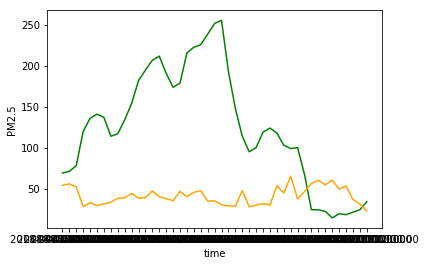

In [204]:
plt.plot(train2_time, train2_PM25_AOTI, color='g')
plt.plot(train2_time, pred_pm25, color='orange')
plt.xlabel('time')
plt.ylabel('PM2.5')
plt.show()

In [205]:
pred_O3=model2.predict(train2_grid_304)
pred_O3

array([109.20686 , 137.63652 , 150.73537 , 135.54239 , 142.33562 ,
       144.61565 , 142.52052 , 144.94899 , 145.00471 , 142.99655 ,
       146.63196 , 138.66396 , 127.55089 , 112.042694,  99.665565,
        72.39296 ,  57.3959  ,  57.469185,  61.69192 ,  72.63394 ,
        50.161037, 120.76726 , 122.71973 , 132.41872 , 134.34592 ,
       134.59882 , 144.80188 , 154.91454 , 151.56975 , 151.58263 ,
       139.96245 , 126.02738 , 124.40876 , 127.14303 , 127.225204,
       132.2711  ,  44.86884 ,  48.780205,  41.19622 ,  42.404095,
       107.39047 , 113.26183 , 114.45563 ,  99.27894 , 121.2928  ],
      dtype=float32)

In [206]:
pred_O3.shape

(45,)

In [207]:
train2_O3_AOTI.shape

(45, 1)

In [208]:
smape( pred_O3,train2_O3_AOTI)

0.7292996668450461

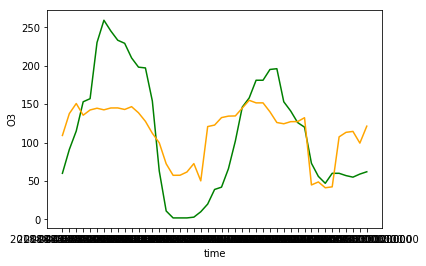

In [209]:
plt.plot(train2_time, train2_O3_AOTI, color='g')
plt.plot(train2_time, pred_O3, color='orange')
plt.xlabel('time')
plt.ylabel('O3')
plt.show()

In [210]:
pred_pm10=model3.predict(train2_grid_304)
pred_pm10

array([107.24376 , 100.115685,  99.897896,  91.47686 ,  97.783775,
        98.19748 , 106.947205,  99.65551 , 107.52424 , 111.49183 ,
        93.56877 , 105.72615 , 102.63138 , 122.20458 , 114.93246 ,
       115.95098 ,  92.75658 ,  91.90341 ,  82.08788 ,  98.56732 ,
        87.79198 , 102.73112 ,  91.01021 ,  85.5701  ,  93.5209  ,
        97.88516 ,  90.89846 ,  87.61263 ,  87.69235 ,  99.78591 ,
        79.9902  ,  98.74403 , 135.93408 , 143.6451  , 145.57997 ,
       132.62619 , 108.919945,  99.16333 , 114.2341  , 109.462395,
       103.539   , 116.72666 , 100.09199 , 114.74671 ,  69.206314],
      dtype=float32)

In [211]:
smape(train2_PM10_AOTI, pred_pm10)

0.5279703958827097

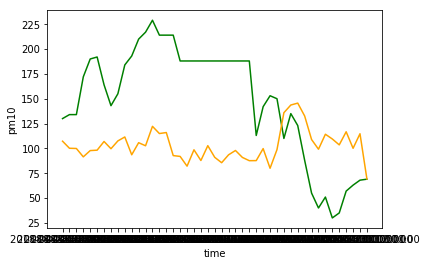

In [212]:
plt.plot(train2_time, train2_PM10_AOTI, color='g')
plt.plot(train2_time, pred_pm10, color='orange')
plt.xlabel('time')
plt.ylabel('pm10')
plt.show()

# output

In [320]:
testfile=pd.read_csv('final_test.csv')
testfile2=testfile[['humidity','pressure','temperature','wind_direction','wind_speed']]
#testfile.station_id.unique().shape
aq=testfile['aqstation']
aq

0           dongsi_aq
1           dongsi_aq
2           dongsi_aq
3           dongsi_aq
4           dongsi_aq
5           dongsi_aq
6           dongsi_aq
7           dongsi_aq
8           dongsi_aq
9           dongsi_aq
10          dongsi_aq
11          dongsi_aq
12          dongsi_aq
13          dongsi_aq
14          dongsi_aq
15          dongsi_aq
16          dongsi_aq
17          dongsi_aq
18          dongsi_aq
19          dongsi_aq
20          dongsi_aq
21          dongsi_aq
22          dongsi_aq
23          dongsi_aq
24          dongsi_aq
25          dongsi_aq
26          dongsi_aq
27          dongsi_aq
28          dongsi_aq
29          dongsi_aq
            ...      
1650    dongsihuan_aq
1651    dongsihuan_aq
1652    dongsihuan_aq
1653    dongsihuan_aq
1654    dongsihuan_aq
1655    dongsihuan_aq
1656    dongsihuan_aq
1657    dongsihuan_aq
1658    dongsihuan_aq
1659    dongsihuan_aq
1660    dongsihuan_aq
1661    dongsihuan_aq
1662    dongsihuan_aq
1663    dongsihuan_aq
1664    do

In [312]:
out_pm25=model.predict(testfile2)
pm25=out_pm25.tolist()

In [313]:
out_pm10=model3.predict(testfile2)
pm10=out_pm10.tolist()

In [314]:
out_03=model2.predict(testfile2)
o3=out_03.tolist()

In [323]:
import pandas as pd

finalout = pd.DataFrame(
    {'aq':aq,
        'pm25': pm25,
     'pm10': pm10,
     'o3': o3
    })

finalout

,aq,pm25,pm10,o3
0,dongsi_aq,26.723251,101.599136,54.108273
1,dongsi_aq,35.953415,98.679253,73.854858
2,dongsi_aq,35.765556,105.355560,62.514000
3,dongsi_aq,38.650227,103.662216,57.078915
4,dongsi_aq,33.669064,115.756630,92.150848
5,dongsi_aq,32.999069,123.394058,93.132141
6,dongsi_aq,33.669064,119.155548,93.244522
7,dongsi_aq,37.884666,109.588707,58.782940
8,dongsi_aq,35.894920,118.884254,66.917122
9,dongsi_aq,36.045845,117.607788,31.963095


In [325]:
finalout.to_csv('final_submission_anqi.csv',index=0)